<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/AnalisisDeDatos/4_Data_Wrangling_Avanzado/ejercicio/ejercicio.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>
<div align="center"> Recordá abrir en una nueva pestaña </div>

# Ejercicio Pandas IV: Informe macroeconómico de Argentina

La consultora "Nuevos Horizontes" quiere hacer un análisis del mercado argentino para entender como ha evolucionado en los últimos años. Van a analizar dos indicadores macroeconómicos principales: el **IPC: Índice de Precios al Consumidor** (para medir inflación) y el tipo de cambio (**cotización del dólar**).

## IPC: Índice de Precios al Consumidor

Para más información sobre el IPC pueden visitar la siguiente página del INDEC: https://www.indec.gob.ar/indec/web/Nivel4-Tema-3-5-31

La base de IPC a analizar tiene como base diciembre de 2016, al cual le corresponde el índice 100. Los precios se encuentran con cuatro niveles de apertura:

* General: Indice de Precios de toda la canasta de bienes y servicios considerada en el análisis

* Estacional: Bienes y servicios con comportamiento estacional. Por ejemplo: frutas y verduras

* Regulados: Bienes y servicios cuyos precios están sujetos a regulación o tienen alto componente impositivo. Por ejemplo: electricidad

* Núcleo: : Resto de los grupos del IPC

Su jefa quiere analizar el comportamiento de los cuatro niveles de apertura del indice de precios en los años que componen el dataset. Para eso le pide que obtenga el promedio, mediana e índice máximo anuales para cada nivel de apertura. Luego, de ser posible, graficar la evolución anual del índice medio a nivel general.

**Pasos sugeridos:**

    1) Leer los datos del IPC.

    2) Modificar la tabla para que cumpla con la definición de tidy data: cada variable debe ser una columna (Apertura, Fecha e Indice).

    3) Convertir la variable de fecha al formato date-time y extraer el año y el mes.

    *Ayuda*: Vas a tener que utilizar el argumento format en la función to_datetime de pandas. En esta página vas a poder encontrar los códigos de formato o directivas necesarios para convertir las fechas: https://docs.python.org/es/3/library/datetime.html#strftime-and-strptime-behavior

    4) Calcular el indice promedio, mediano y maximo por año para cada nivel de apertura.

    5) Graficar.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

**1) Leer los datos del IPC.**

In [3]:
ipc_df = pd.read_csv('./ipc_indec.csv')

In [4]:
ipc_df.head()

,Apertura,Dec-16,Jan-17,Feb-17,Mar-17,Apr-17,May-17,Jun-17,Jul-17,Aug-17,...,Sep-19,Oct-19,Nov-19,Dec-19,Jan-20,Feb-20,Mar-20,Apr-20,May-20,Jun-20
0,Nivel general,100.0,101.6,103.7,106.1,109.0,110.5,111.8,113.8,115.4,...,253.7,262.1,273.2,283.4,289.8,295.7,305.6,310.1,314.9,322.0
1,Estacional,100.0,101.7,102.3,104.8,108.2,109.1,110.1,110.6,111.8,...,217.0,223.2,239.6,244.7,253.6,260.0,272.7,285.9,299.3,313.6
2,Núcleo,100.0,101.5,103.2,105.2,107.4,109.2,110.7,112.6,114.2,...,250.5,260.0,270.4,280.3,287.2,294.0,303.2,308.4,313.3,320.6
3,Regulados,100.0,101.8,105.9,110.0,114.5,115.7,116.7,119.4,121.1,...,284.7,290.5,301.6,315.5,319.1,321.3,331.9,329.7,329.4,331.8


In [5]:
ipc_df.shape

(4, 44)

In [6]:
ipc_df.columns

Index(['Apertura', 'Dec-16', 'Jan-17', 'Feb-17', 'Mar-17', 'Apr-17', 'May-17',
       'Jun-17', 'Jul-17', 'Aug-17', 'Sep-17', 'Oct-17', 'Nov-17', 'Dec-17',
       'Jan-18', 'Feb-18', 'Mar-18', 'Apr-18', 'May-18', 'Jun-18', 'Jul-18',
       'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 'Dec-18', 'Jan-19', 'Feb-19',
       'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19',
       'Oct-19', 'Nov-19', 'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20', 'Apr-20',
       'May-20', 'Jun-20'],
      dtype='object')

**2) Modificar la tabla** para que cumpla con la definición de tidy data: cada variable debe ser una columna (Apertura, Fecha e Indice).

In [7]:
ipc_df_tidy = pd.melt(ipc_df,
        id_vars=["Apertura"],
        var_name="Fecha",
        value_name="Indice")
ipc_df_tidy.head()

,Apertura,Fecha,Indice
0,Nivel general,Dec-16,100.0
1,Estacional,Dec-16,100.0
2,Núcleo,Dec-16,100.0
3,Regulados,Dec-16,100.0
4,Nivel general,Jan-17,101.6


**3)** Convertir la **variable de fecha** al formato date-time y extraer el año y el mes


In [21]:
ipc_df_tidy["Fecha"] = pd.to_datetime(ipc_df_tidy["Fecha"])

In [22]:
ipc_df_tidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Apertura  172 non-null    object        
 1   Fecha     172 non-null    datetime64[ns]
 2   Indice    172 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.2+ KB


In [23]:
ipc_df_tidy.head()

,Apertura,Fecha,Indice
0,Nivel general,2016-12-01,100.0
1,Estacional,2016-12-01,100.0
2,Núcleo,2016-12-01,100.0
3,Regulados,2016-12-01,100.0
4,Nivel general,2017-01-01,101.6


In [25]:
ipc_df_tidy = ipc_df_tidy.set_index("Fecha")
ipc_df_tidy.head()

,Apertura,Indice
Fecha,,
2016-12-01,Nivel general,100.0
2016-12-01,Estacional,100.0
2016-12-01,Núcleo,100.0
2016-12-01,Regulados,100.0
2017-01-01,Nivel general,101.6


In [26]:
ipc_df_tidy.index

DatetimeIndex(['2016-12-01', '2016-12-01', '2016-12-01', '2016-12-01',
               '2017-01-01', '2017-01-01', '2017-01-01', '2017-01-01',
               '2017-02-01', '2017-02-01',
               ...
               '2020-04-01', '2020-04-01', '2020-05-01', '2020-05-01',
               '2020-05-01', '2020-05-01', '2020-06-01', '2020-06-01',
               '2020-06-01', '2020-06-01'],
              dtype='datetime64[ns]', name='Fecha', length=172, freq=None)

In [27]:
ipc_df_tidy["Año"] = ipc_df_tidy.index.year
ipc_df_tidy["Mes"] = ipc_df_tidy.index.month
ipc_df_tidy.head()

,Apertura,Indice,Año,Mes
Fecha,,,,
2016-12-01,Nivel general,100.0,2016,12
2016-12-01,Estacional,100.0,2016,12
2016-12-01,Núcleo,100.0,2016,12
2016-12-01,Regulados,100.0,2016,12
2017-01-01,Nivel general,101.6,2017,1


**4)** Calcular el **indice promedio, mediano y maximo** por año para cada nivel de apertura.

In [29]:
ipc_df_tidy.head(15)

,Apertura,Indice,Año,Mes
Fecha,,,,
2016-12-01,Nivel general,100.0,2016,12
2016-12-01,Estacional,100.0,2016,12
2016-12-01,Núcleo,100.0,2016,12
2016-12-01,Regulados,100.0,2016,12
2017-01-01,Nivel general,101.6,2017,1
2017-01-01,Estacional,101.7,2017,1
2017-01-01,Núcleo,101.5,2017,1
2017-01-01,Regulados,101.8,2017,1
2017-02-01,Nivel general,103.7,2017,2


In [31]:
resultado = (ipc_df_tidy.groupby(["Año", "Apertura"])
                        .agg({
                            "Indice": ["mean", "median", "max"]
                        }))
resultado.columns = ["Promedio", "Mediana", "Máximo"]
resultado = resultado.round({'Promedio': 2, 'Mediana': 2, 'Máximo': 2})
resultado

Promedio  Mediana  Máximo
Año  Apertura                                
2016 Estacional       100.00   100.00   100.0
     Nivel general    100.00   100.00   100.0
     Núcleo           100.00   100.00   100.0
     Regulados        100.00   100.00   100.0
2017 Estacional       111.37   110.35   121.5
     Nivel general    112.89   112.80   124.8
     Núcleo           111.49   111.65   121.1
     Regulados        118.28   118.05   138.7
2018 Estacional       139.96   137.05   164.3
     Nivel general    151.58   147.05   184.3
     Núcleo           146.83   142.75   178.9
     Regulados        173.72   166.85   212.9
2019 Estacional       198.08   189.15   244.7
     Nivel general    232.76   228.00   283.4
     Núcleo           228.29   222.55   280.3
     Regulados        266.60   267.40   315.5
2020 Estacional       280.85   279.30   313.6
     Nivel general    306.35   307.85   322.0
     Núcleo           304.45   305.80   320.6
     Regulados        327.20   329.55   331.9

**5) Graficar**

<Axes: xlabel='Fecha'>

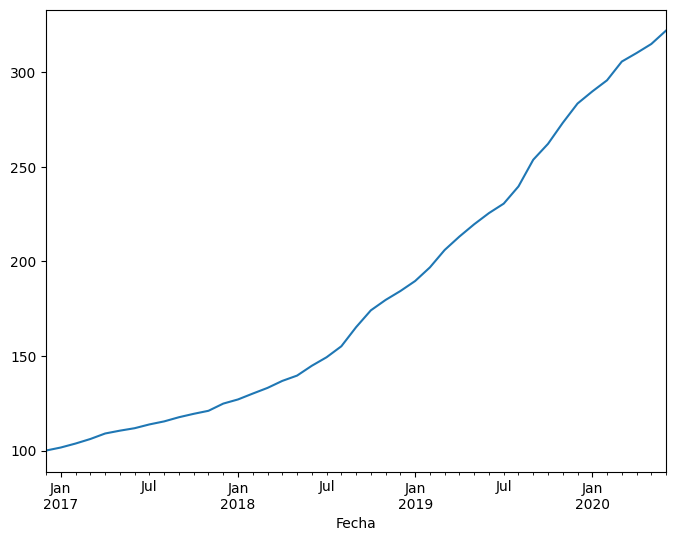

In [36]:
import matplotlib.pyplot as plt

ipc_df_tidy[ipc_df_tidy["Apertura"] == "Nivel general"]["Indice"].plot(figsize=(8,6))

### Dolar

La base de cotización de dolar traer los precios de compra y venta oficiales de la divisa en Argentina desde el 01-06-2015 hasta el 03-08-2020 según el portal Ámbito Financiero.

Para proseguir con el informe se quiere obtener la cotización media diaria (promedio entre compra y venta) y obtener la mediana mensual con su respectivo gráfico. Adicionalmente, se quiere encontrar el top 5 de los días con mayores aumentos porcentuales en el tipo de cambio para la misma ventana de tiempo que se analizó el IPC (desde 01-12-2016 hasta el 30-06-2020)

**Pasos sugeridos:**

    1) Leer los datos de la cotización del dolar

    2) Crear una variable que compute el valor promedio entre compra y venta por día

    3) Convertir la fecha de un dato tipo string a un objeto datetime (to_datetime). Construir las variables de año y mes.

    4) Calcular el promedio mensual y graficar (recordar ordenar en forma ascendente la fecha)

    5) Ordenar de manera ascendente por fecha, filtrar las fechas señaladas y calcular la variación porcentual diaria en la cotización

    6) Hallar los 5 días con mayor variación en la cotización.

**1)** Leer los datos de la cotización del dolar

In [37]:
dolar_df = pd.read_csv('./dolar_oficial_ambito.csv')

In [38]:
dolar_df.shape

(1268, 3)

In [39]:
dolar_df.head()

,fecha,compra,venta
0,05-08-2020,71.89,76.89
1,04-08-2020,71.69,76.69
2,03-08-2020,71.64,76.64
3,31-07-2020,71.39,76.39
4,30-07-2020,71.27,76.27


**2)** Crear una variable que compute el valor **promedio** entre compra y venta por día

In [43]:
dolar_df["promedio"] = dolar_df.loc[:, ["venta", "compra"]].mean(axis=1)
dolar_df = dolar_df.round({"promedio": 2})
dolar_df.head()

,fecha,compra,venta,promedio
0,05-08-2020,71.89,76.89,74.39
1,04-08-2020,71.69,76.69,74.19
2,03-08-2020,71.64,76.64,74.14
3,31-07-2020,71.39,76.39,73.89
4,30-07-2020,71.27,76.27,73.77


**3)** Convertir la **fecha** de un dato tipo string a un objeto datetime (to_datetime) y construir las variables de año y mes

In [45]:
dolar_df["fecha"] = pd.to_datetime(dolar_df["fecha"], format="%d-%m-%Y")

In [46]:
dolar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   fecha     1268 non-null   datetime64[ns]
 1   compra    1268 non-null   float64       
 2   venta     1268 non-null   float64       
 3   promedio  1268 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 39.8 KB


In [47]:
dolar_df = dolar_df.set_index("fecha")
dolar_df["año"] = dolar_df.index.year
dolar_df["mes"] = dolar_df.index.month
dolar_df.head()

,compra,venta,promedio,año,mes
fecha,,,,,
2020-08-05,71.89,76.89,74.39,2020,8
2020-08-04,71.69,76.69,74.19,2020,8
2020-08-03,71.64,76.64,74.14,2020,8
2020-07-31,71.39,76.39,73.89,2020,7
2020-07-30,71.27,76.27,73.77,2020,7


**4)** Calcular el promedio mensual y graficar.

In [50]:
resultado = (dolar_df.groupby(["año", "mes"])
                     .agg({
                         "promedio": "mean"
                     }))
resultado.columns = ["prom_mensual"]
resultado.head()

prom_mensual
año  mes              
2015 6        9.031818
     7        9.132727
     8        9.232500
     9        9.355455
     10       9.479048

<Axes: xlabel='año,mes'>

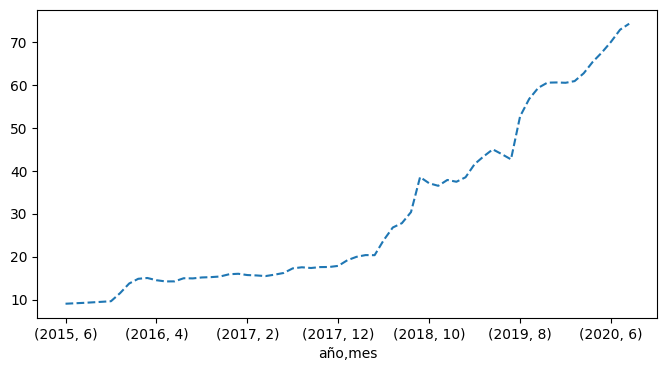

In [52]:
resultado["prom_mensual"].plot(figsize=(8,4), style="--")

**5)** Ordenar de manera ascendente por fecha, filtrar las fechas señaladas y calcular la variación porcentual diaria en la cotización.

Fechas indicadas: "2016-12-01" - "2020-06-30"

Para calcular la variación porcentual debemos realizar la siguiente cuenta:

$VariacionPorcentual = \frac{CotizacionHoy - CotizacionAyer}{CotizacionAyer}*100$

In [53]:
dolar_df.sort_index(ascending=True, inplace=True)
dolar_df.head()

,compra,venta,promedio,año,mes
fecha,,,,,
2015-06-01,8.96,9.01,8.98,2015,6
2015-06-02,8.97,9.02,9.00,2015,6
2015-06-03,8.97,9.02,9.00,2015,6
2015-06-04,8.97,9.02,9.00,2015,6
2015-06-05,8.98,9.03,9.00,2015,6


**6)** Hallar los 5 días con mayor variación en la cotización.